# Modeliranje mreža s predznakom matricama niskog ranga

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

Prvo zadajemo graf u kojem tanji bridovi označavaju da između vrhova postoji negativna povezanost, a deblji bridovi da između vrhova postoji pozitivna povezanost. Na tom grafu ćemo testirati naše rezutate.

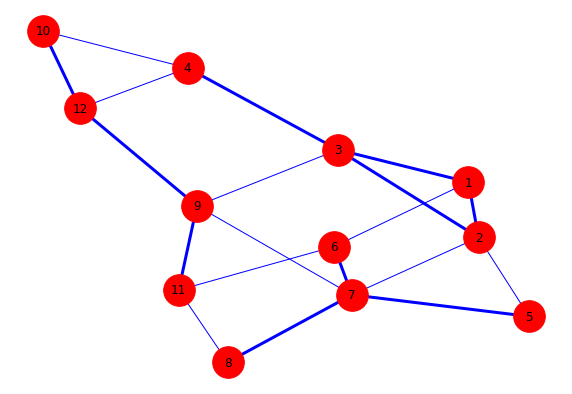

In [2]:
fig, ax = plt.subplots(1, figsize=(10,7))

G = nx.Graph()
G.add_nodes_from(['1','2','3','4','5','6','7','8','9','10','11','12'])

G.add_edge('1', '2', tezina=1)
G.add_edge('1', '3', tezina=1)
G.add_edge('1', '6', tezina=-1)
G.add_edge('2', '3', tezina=1)
G.add_edge('2', '5', tezina=-1)
G.add_edge('2', '7', tezina=-1)
G.add_edge('3', '4', tezina=1)
G.add_edge('3', '9', tezina=-1)
G.add_edge('4', '10', tezina=-1)
G.add_edge('4', '12', tezina=-1)
G.add_edge('5', '7', tezina=1)
G.add_edge('6', '7', tezina=1)
G.add_edge('6', '11', tezina=-1)
G.add_edge('7', '9', tezina=-1)
G.add_edge('7', '8', tezina=1)
G.add_edge('8', '11', tezina=-1)
G.add_edge('9', '11', tezina=1)
G.add_edge('9', '12', tezina=1)
G.add_edge('10', '12', tezina=1)


oznake = nx.get_edge_attributes(G, 'tezina')
tezine = [G[u][v]['tezina'] + 2 for u,v in G.edges()]

pos = nx.spring_layout(G)

nx.draw(G, pos, ax, width=tezine, node_size=1000, with_labels=True, node_color='r', edge_color= 'b')

# SVP

In [2]:
import numpy as np

**SVP algoritam:** <br>
Inicijalizacija: $X^0 =$ 0 i $t = 0$ <br>
Ponavljaj: <br>
$\;\;\;\;\;\;$    $Y^{t+1} \leftarrow X^t - \frac{1}{(1 + \delta )p}(P_{\Omega}(X^t)-P_{\Omega}(X^*))$ <br>
$\;\;\;\;\;\;$    Izračunaj k najvećih singularnih vektora od $Y^{t+1}$: $U_k, \Sigma_k, V_k$ <br>
$\;\;\;\;\;\;$    $X^{t+1} \leftarrow U_k \Sigma_k V_k^T$ <br>
$\;\;\;\;\;\;$    $t \leftarrow t+1$ <br>
Dok $||X^{t+1}-X^*|| < \epsilon$ <br>
<br>
Gdje su redom: $X^*$ zadana matrica odnosa, $P_\Omega$ projekcija na prostor zadanih vrijednosti $\Omega$, $p \geq \frac{C \mu ^2 k^2 log(n)}{ \delta^2 m}$, $0 < \delta < 1$.

In [3]:
"""
ulaz: matrica odnosa, rang izlazne matrice, koeficijenti delta i p(gustoća uzorkovanog ulaza)
izlaz: potpuna matrica odnosa
"""
def svp(A, k, delta, p):
    
    (m, n) = A.shape
    X = np.zeros(A.shape)
    
    # kriterij zaustavljanja (konvergencija matrice X k matrici A)
    for z in range(20):
        print(z)
        
        C = X
        
        # projekcija matrice X na prostor zadanih odnosa
        for k in range(m):
            for l in range(n):
                
                if( A[k][l] == 0 ):
                    X[k][l] = 0
        
        # transformacija iz svp-a
        C = C-(1/((1+delta)*p))*(X-A);
        U, S, V = np.linalg.svd(C, full_matrices=True)
        X = U[:, 0:k+1] @ np.diag(S)[0:k+1, 0:k+1] @ V[:, 0:k+1] 
        
    D = X
    E = np.zeros( A.shape )
    
    # diskretizacija
    for i in range(m):
        for j in range(n):
            if( D[i][j] > 0):
                E[i][j] = 1
            elif(D[i][j] < 0):
                E[i][j] = -1
    
    return E

In [5]:
A = np.array([[1,1,1,0,0,-1,0,0,0,0,0,0],
              [1,1,1,0,-1,0,-1,0,0,0,0,0],
              [1,1,1,1,0,0,0,0,-1,0,0,0],
              [0,0,1,1,0,0,0,0,0,-1,0,-1],
              [0,-1,0,0,1,0,1,0,0,0,0,0], 
              [-1,0,0,0,0,1,1,0,0,0,-1,0], 
              [0,-1,0,0,1,1,1,1,-1,0,0,0], 
              [0,0,0,0,0,0,1,1,0,0,-1,0],
              [0,0,-1,0,0,0,-1,0,1,0,1,1],
              [0,0,0,-1,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,-1,0,-1,1,0,1,0],
              [0,0,0,-1,0,0,0,0,1,1,0,1]])

A

array([[ 1,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  0, -1,  0, -1,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0,  0, -1,  0, -1],
       [ 0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
       [-1,  0,  0,  0,  0,  1,  1,  0,  0,  0, -1,  0],
       [ 0, -1,  0,  0,  1,  1,  1,  1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0, -1,  0],
       [ 0,  0, -1,  0,  0,  0, -1,  0,  1,  0,  1,  1],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, -1,  0, -1,  1,  0,  1,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  1,  1,  0,  1]])

In [6]:
Z = svp( A, 3, 0.5, 200)
Z

array([[ 1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.],
       [-1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.],
       [-1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.],
       [-1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.],
       [-1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.]])

# ALS

Minimizacijski problem: $min_{W,H \in \mathbf{R}^{k \times n}} \sum _{(i,j) \in \Omega} (A_{ij} - (W^T H)_{ij})^2 + \lambda ||W||_F^2 + \lambda ||H||_F^2$ <br>
Jedna iteracija ALS algoritma se svodi na to da fiksiramo $W$ ili $H$, pa rješavamo problem najmanjih kvadrata po nekoj od tih varijabli koju nismo fiksirali. Nakon što smo fiksirali jednu varijablu i rješili pripadni problem najmanjih kvadrata, zatim fiksiramo drugu varijablu i rješimo pripadni problem najmanjih kvadrata.  <br>
Rješenje metode najmanjih kvadrata je dano jednadžbom: $w_u = a_u * H^T(H H^T + \lambda I)^{-1}$, gdje mala slova s indeksom označavaju retke matrice označene istim slovom(ali velikim).

In [20]:
"""
ulaz: matrica odnosa, rang izlazne matrice, koeficijent lambda
izlaz: potpuna matrica odnosa
"""
def als( A, lamda, k):
    
    (m, n) = A.shape
    # proizvoljno inicijaliziramo W i H
    W = np.ones( (k,n) )
    H = np.ones( (k,n) )
    
    for z in range(20):
        print(z)
        
        # update-amo stupce matrice W
        B = np.zeros( (k,k) )
        B = H @ H.transpose()
            
        # za svaki redak matrice W    
        for i in range(n):
            C = np.zeros( (1,k) )
            
            # ans = a_u * H^T
            for j in range(n):
                C = C + A[i, j] * H[:, j]

            # w_u =  ans * (HH^T + lambda*I)^-1
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):
                W[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose()).transpose()

        # analogno update-amo stupce matrice H
        B = np.zeros( (k,k) )
        
        B =  W @ W.transpose() 
            
        for i in range(n):
            C = np.zeros( (1,k) )
            for j in range(n):
                C = C + A[i,j] * W[:, j]
            
            if( np.linalg.matrix_rank( B + lamda * np.eye(k) ) == k ):
                H[:, i] = ( np.linalg.inv(B + lamda * np.eye(k) ) @ C.transpose()).transpose()
    
    # D = W^T * H
    D = W.transpose() @ H

    # diskretizacija
    E = np.zeros( (n,n) )
    for i in range(n):
        for j in range(n):
            if( D[i, j] > 0 ):
                E[i,j] = 1
                    
            elif( D[i,j] < 0 ):
                E[i,j] = -1
 
    return E

In [8]:
als( A, 0.5, 3) 

array([[ 1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1., -1., -1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1., -1.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.],
       [-1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.],
       [-1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.],
       [-1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.],
       [-1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.],
       [-1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.]])

# Clustering

**Algoritam:** Klasteriranje s nadopunjavanjem matrice <br>
Ulaz: matrica odnosa $A$, broj klastera $k$ <br>
Izlaz: klasteri <br>
1. $X \leftarrow$ popunjenje od $A$ (npr. ALS-om) <br>
2. $U \leftarrow$ najvećih k svojstvenih vektora od $X$ <br>
3. bilo koji feature-based algoritam za klasteriranje na $U$ (npr. k-means)

In [9]:

def clustering(A, lamda, k):
    
    (m, n) = A.shape
    # prvo als-om "nadopunjujemo" A (0 u 1 ili -1)
    W = np.ones( (k, n) )
    H = np.ones( (k, n) )
    
    for z in range(100):
        
        # update-amo stupce matrice W
        B = np.zeros( (k,k) )
        for i in range(m):
            B = H @ H.transpose() 
            
        for i in range(m):
            C = np.zeros( (1, k) )
            
            for j in range(n):
                C = C + ( A[i, j] * H[:, j] )   
            
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):    
                W[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose() ).transpose()
        
        # update-amo stupce matrice H
        B = np.zeros( (k,k) )
        for i in range(m):
            B =  W @ W.transpose() 
            
        for i in range(m):
            C = np.zeros( (1, k) )
            for j in range(n):
                C = C + A[i, j] * W[:, j]
            
            if( np.linalg.matrix_rank(B + lamda * np.eye(k)) == k ):
                H[:, i] = ( np.linalg.inv( B + lamda * np.eye(k) ) @ C.transpose() ).transpose()
            
    D = W.transpose() @ H
    r = np.linalg.matrix_rank( D )
    
    E = np.zeros( (n, n) )
    for i in range(m):
        for j in range(n):
            if( D[i, j] > 0 ):
                E[i, j] = 1
                
            elif( D[i, j] < 0 ):
                E[i, j] = -1
    
    # E je potpuna matrica dobivena nadopunjavanjem A
    print(E)
    
    # stupci od U su sv. vektori najdominantnijih sv. vrijednosti
    U = np.zeros( (n, k) )
    v, S = np.linalg.eig( E ) # D ili E
    
    for i in range(k):
        m_index = np.argmax( np.absolute(v) )
        v[m_index] = 0
        U[:, i] = S[:, m_index]
        
    a = U.transpose()
    
    p = np.random.permutation( n )
    
    # u H zapisujemo rješenje
    H = np.zeros( (n, k) )
    
    for i in range( n ):
        l = i % k
        H[p[i], l] = 1
    
    # k-means
    for z in range(20):
        
        m = np.zeros( (k, k) )
        s = np.zeros( k )
        
        for i in range(n):
            for j in range(k):
                
                if( H[i, j] > 0 ):
                    m[:, j] = m[:, j] + a[:, i]
                    s[j] = s[j] + 1
                    
        for j in range(k):
            m[:, j] = m[:, j] / s[j]
            
        H = np.zeros( (n, k) )
        
        for i in range(n):
            dst = np.zeros( k )
            for j in range(k):
                dst[j] = np.linalg.norm( m[:, j] - a[:, i] )
                
            H[i, np.argmin(dst)] = 1
                    
    print(H)
    return H
        

In [10]:
H = clustering(A, 0.5, 3)

[[ 1.  1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1.]
 [-1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.]
 [-1. -1. -1.  1.  1.  1.  1.  1. -1. -1. -1. -1.]
 [-1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.]
 [ 1.  1. -1. -1. -1.  1. -1.  1.  1.  1. -1.  1.]
 [-1.  1. -1.  1. -1. -1. -1. -1.  1. -1.  1.  1.]
 [-1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


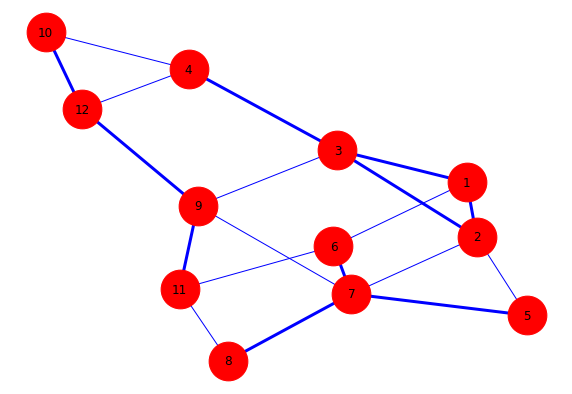

In [11]:
fig, ax = plt.subplots(1, figsize=(10,7))

nx.draw(G, pos, ax, width=tezine, node_size=1500, with_labels=True, node_color='r', edge_color= 'b')

Pogledajmo sada kako funkcionira klasteriranje na našem primjeru.

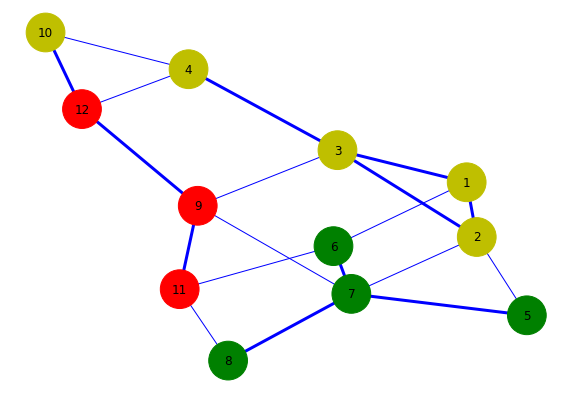

In [12]:
colors = ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r']
(m, n) = H.shape

for i in range(m):
    for j in range(n):
        if H[i, j] == 1 and j == 0:
            colors[i] = 'r'
            
        elif H[i, j] == 1 and j == 1:
            colors[i] = 'g'
        
        elif H[i, j] == 1 and j == 2:
            colors[i] = 'y'


fig, ax = plt.subplots(1, figsize=(10,7))

nx.draw(G, pos, ax, width=tezine, node_size=1500, with_labels=True, node_color=colors, edge_color= 'b')

# Bitcoin dataset

Dataset smo preuzeli sa stranice http://snap.stanford.edu/data/soc-sign-bitcoin-otc.html, te se on sastoji od 5881 čvorova i 35592 bridova čije težina poprimaju vrijednosti između -10 i 10. Prvo pripremamo podatke za ulaz u algoritme. Kreiramo matricu odnosa tako da brid negativne vrijednosti smatramo negativnim odnosom pripadnih čvorova, a pozitivan brid smatramo pozitivnim odnosom pripadnih čvorova. Uzimamo oko 10% bridova za testiranje i uklanjamo pripadne odnose iz matrice odnosa. Na kraju pokrećemo algoritme na takvim matricama odnosa i testiramo rezultate na bridovima koje smo prethodno odvojili za testiranje.

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('soc-sign-bitcoinotc.csv', sep=",", header=None)
data.columns = ["node1", "node2", "link", "time"]

In [23]:
data.head()

,node1,node2,link,time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


In [25]:
a1 = data["node1"].max()
a2 = data["node2"].max()
a3 = data["node1"].min()
a4 = data["node2"].min()
a1, a2, a3, a4

(6000, 6005, 1, 1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35592 entries, 0 to 35591
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   node1   35592 non-null  int64  
 1   node2   35592 non-null  int64  
 2   link    35592 non-null  int64  
 3   time    35592 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 1.1 MB


In [39]:
n = 6006
matrix = np.identity(n, dtype='int8')

for index, row in data.iterrows():
    if(row['link'] > 0):
        matrix[ int(row['node1']), int(row['node2']) ] = 1
    elif( row['link'] < 0):
        matrix[ int(row['node1']), int(row['node2']) ] = -1

In [6]:
test = data.sample(3600)

In [40]:
for index, row in test.iterrows():
    matrix[ int(row['node1']), int(row['node2']) ] = 0

In [38]:
res = als(matrix, 0.5, 20)
hits = 0

for index, row in test.iterrows():
    if( res[ int(row['node1']), int(row['node2']) ] == 1 and row['link'] > 0):
        hits+=1
    elif( res[ int(row['node1']), int(row['node2']) ] == -1 and row['link'] < 0):
        hits+=1
        
print(hits/3600)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.8508333333333333


Za rang=20, ALS točno predviđa u 85% slučajeva, na prethodno odabranom skupu za testiranje.

In [43]:
res2 = svp( matrix, 20, 0.5, 1000)
hits = 0

for index, row in test.iterrows():
    if( res2[ int(row['node1']), int(row['node2']) ] == 1 and row['link'] > 0):
        hits+=1
    elif( res2[ int(row['node1']), int(row['node2']) ] == -1 and row['link'] < 0):
        hits+=1
        
print(hits/3600)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.5444444444444444


Za rang k=20 i p=1000, SVP predviđa točno u 54.44% slučajeva što je malo bolje od slučajnog pogađanja. U ovom slučaju bi trebali napraviti pretraživanje parametara p da vidimo za koju vrijednost daje najbolje rezultate.

In [7]:
n = 6006
matrix1 = np.identity(n, dtype='int8')

for index, row in data.iterrows():
    if(row['link'] > 0):
        matrix1[ int(row['node1']), int(row['node2']) ] = 1
    elif( row['link'] < 0):
        matrix1[ int(row['node1']), int(row['node2']) ] = -1
        
for index, row in test.iterrows():
    matrix1[ int(row['node1']), int(row['node2']) ] = 0
    
res3 = svp( matrix1, 20, 0.5, 10000)
hits = 0

for index, row in test.iterrows():
    if( res3[ int(row['node1']), int(row['node2']) ] == 1 and row['link'] > 0):
        hits+=1
    elif( res3[ int(row['node1']), int(row['node2']) ] == -1 and row['link'] < 0):
        hits+=1
        
print(hits/3600)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.49194444444444446
